In [283]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sudoku_solver import filter_image

%matplotlib inline



def line_intersect(A1, A2, B1, B2):
    # https://stackoverflow.com/questions/20677795/how-do-i-compute-the-intersection-point-of-two-lines-in-python
    def slope(P1, P2):
        return(P2[1] - P1[1]) / (P2[0] - P1[0])

    def y_intercept(P1, slope):
        return P1[1] - slope * P1[0]
   
    m1, m2 = slope(A1, A2), slope(B1, B2)
    if m1 == m2:
        print ("These lines are parallel!!!")
        return None
    
    b1, b2, = y_intercept(A1, m1), y_intercept(B1, m2)
    
    x = (b2 - b1) / (m1 - m2)
    y = m1 * x + b1
    return x,y


def rho_theta_to_coords(line, image_shape=None):
    rho, theta = line
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    return x1, y1, x2, y2

def nearest_neighbors(arr, values):
    res = []
    vs = list(np.sort(values))
    thresholds = list((vs[i+1]+vs[i])/2 for i in range(len(vs)-1))
    thresholds.insert(0, np.min(arr)*(1+np.finfo(type(arr[0])).eps))
#     print(np.finfo(type(arr[0])).epsneg, np.min(arr),
#           np.min(arr)*(1+np.finfo(type(arr[0])).eps),
#           np.min(arr)<np.min(arr)*(1+np.finfo(type(arr[0])).eps))
    thresholds.append(np.max(arr))
    for th_i in range(1, len(thresholds)):
#         print(thresholds[th_i-1], thresholds[th_i])
        indexes_1 = np.where(arr<=thresholds[th_i])[0]
        indexes_2 = np.where(arr>thresholds[th_i-1])[0]
        indexes = list(set(indexes_1).intersection(indexes_2))
        res.append(indexes)
    return res




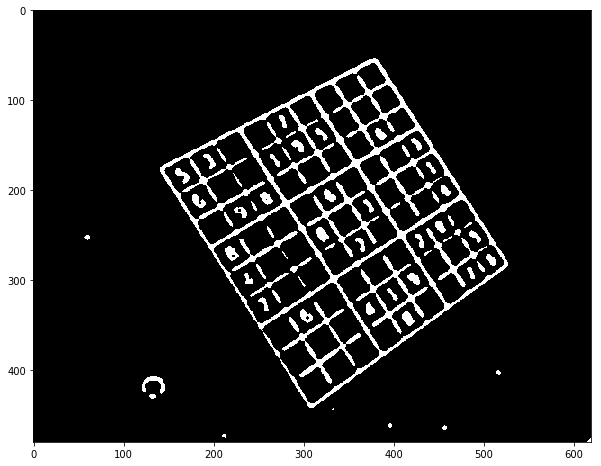

In [4]:
path = "pics/test1.jpg"
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE )

filtered_img = filter_image(img)
plt.figure(figsize=(10,10))
plt.imshow(filtered_img, cmap="gray")
plt.show()

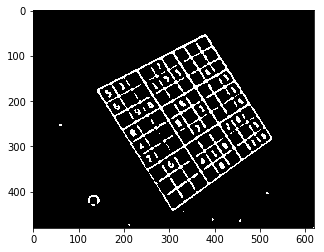

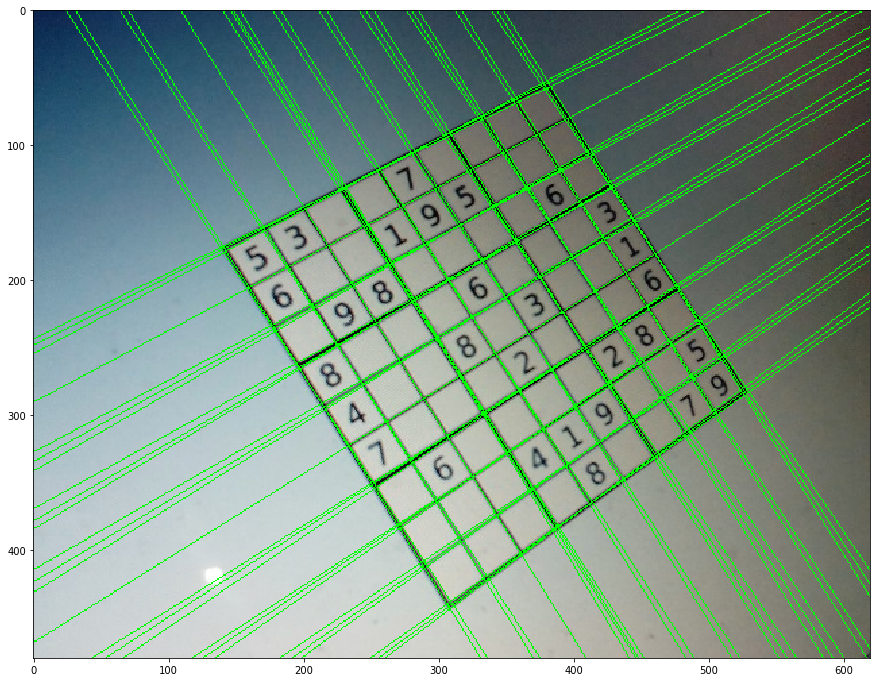

In [237]:
plt.imshow(filtered_img, cmap="gray")
plt.show()

lines = cv2.HoughLines(filtered_img, 1, np.pi/180, 30)
# lines = filter_lines(lines)

rgb_img = cv2.imread(path)
# rgb_img = np.ones((filtered_img.shape[0], filtered_img.shape[1], 3))
# for i in range(rgb_img.shape[0]):
#     for j in range(rgb_img.shape[1]):
#         rgb_img[i][j] = [filtered_img[i][j]]*3

lines = lines[:50]
for line in lines:
    line = line[0]
    x1, y1, x2, y2 = rho_theta_to_coords(line)
    cv2.line(rgb_img, (x1, y1), (x2, y2), (0, 255, 0), 1)
    
    
#     cv2.circle(rgb_img,(x1,y1), 1, (0,0,255), -1)
#     cv2.circle(rgb_img,(x2,y2), 1, (0,0,255), -1)

plt.figure(figsize=(15, 15))
plt.imshow(rgb_img)
plt.show()



50
[24  2  0  0  0  0  0  0  0 24]
[2 3 4 5 6 7 8 1 0 9]
2.4329891 0.9250245
26


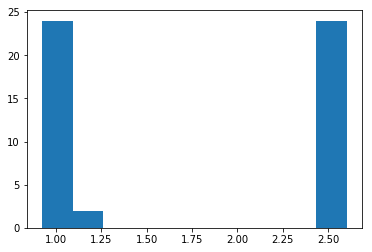

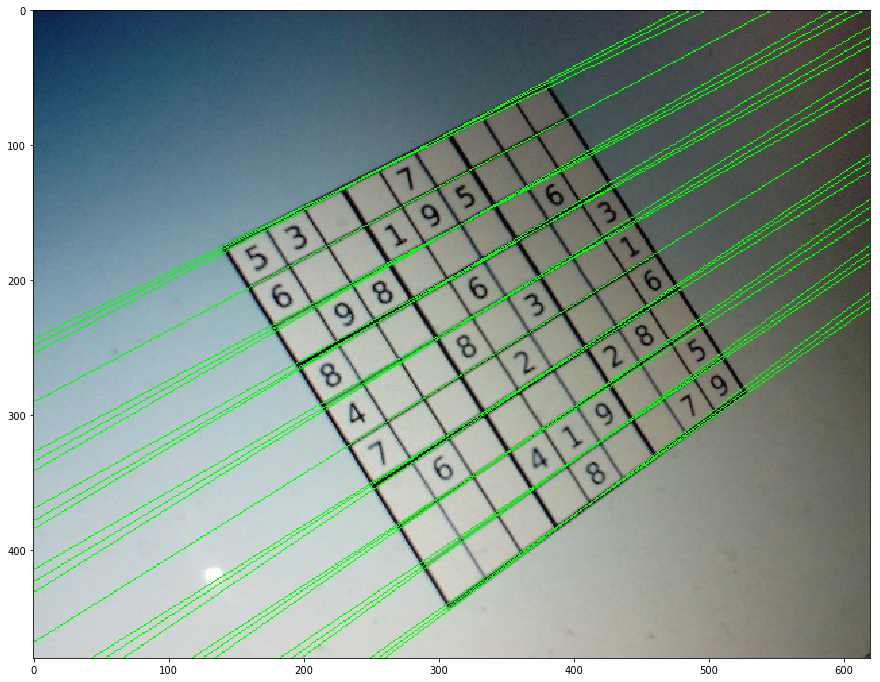

24


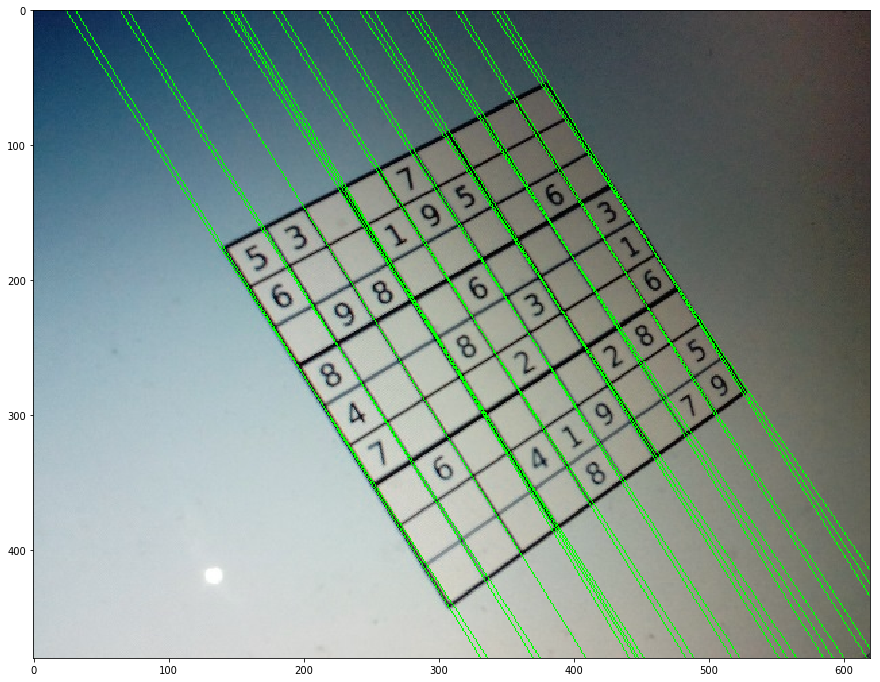

In [259]:
thetas = np.array(list(line[0][1] for line in lines))
print(len(thetas))
plt.hist(thetas)
count, ths = np.histogram(thetas)
print(count)
print( np.argsort(count))
th1, th2 = ths[((np.argsort(count))[::-1])[:2]]
print(th1, th2)

thetas_1, thetas_2 = nearest_neighbors(thetas, [th1, th2])

print(len(thetas_1))
lines_1 = lines[thetas_1]
# print(lines_1)

rgb_img = cv2.imread(path)
for line in lines_1:
    line = line[0]
    x1, y1, x2, y2 = rho_theta_to_coords(line)
    cv2.line(rgb_img, (x1, y1), (x2, y2), (0, 255, 0), 1)

plt.figure(figsize=(15, 15))
plt.imshow(rgb_img)
plt.show()

print(len(thetas_2))
lines_2 = lines[thetas_2]
# print(lines_2)

rgb_img = cv2.imread(path)
for line in lines_2:
    line = line[0]
    x1, y1, x2, y2 = rho_theta_to_coords(line)
    cv2.line(rgb_img, (x1, y1), (x2, y2), (0, 255, 0), 1)

plt.figure(figsize=(15, 15))
plt.imshow(rgb_img)
plt.show()



[[1, 2], [3], [4, 5, 6], [8, 9, 7], [10, 11, 12], [13], [16, 14, 15], [17, 18, 19], [20, 21, 22], [24, 25, 23]]


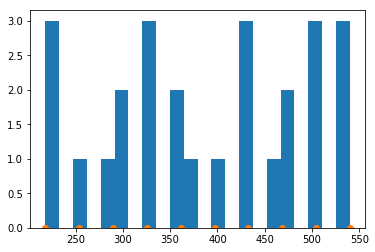

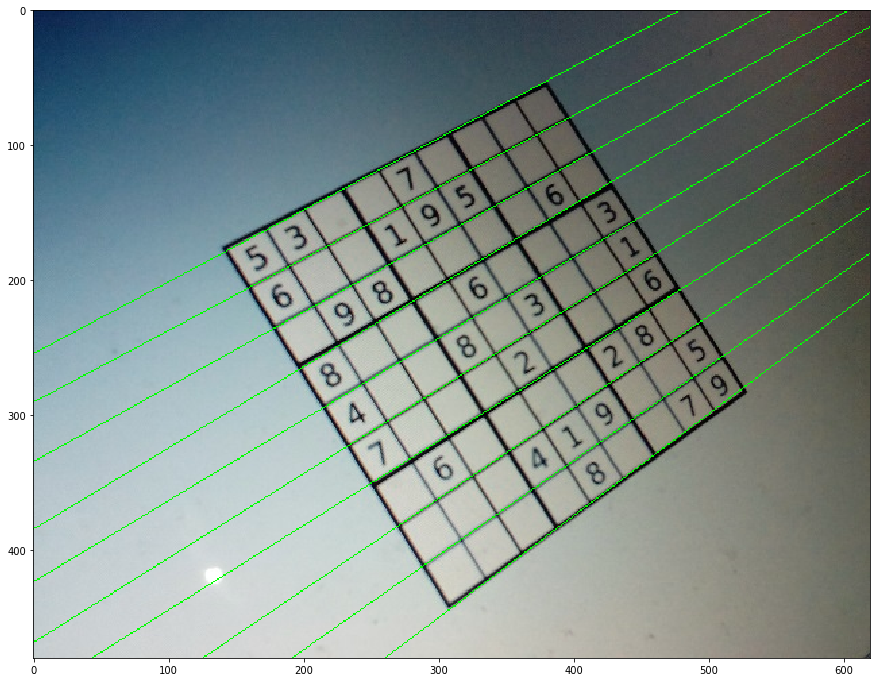

[[0, 1, 2], [3, 4], [5, 6, 7], [8, 9, 10], [11, 12], [13, 14, 15], [16, 17, 18], [19], [20, 21], [22, 23]]


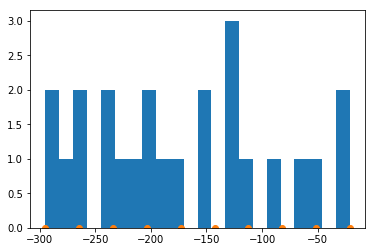

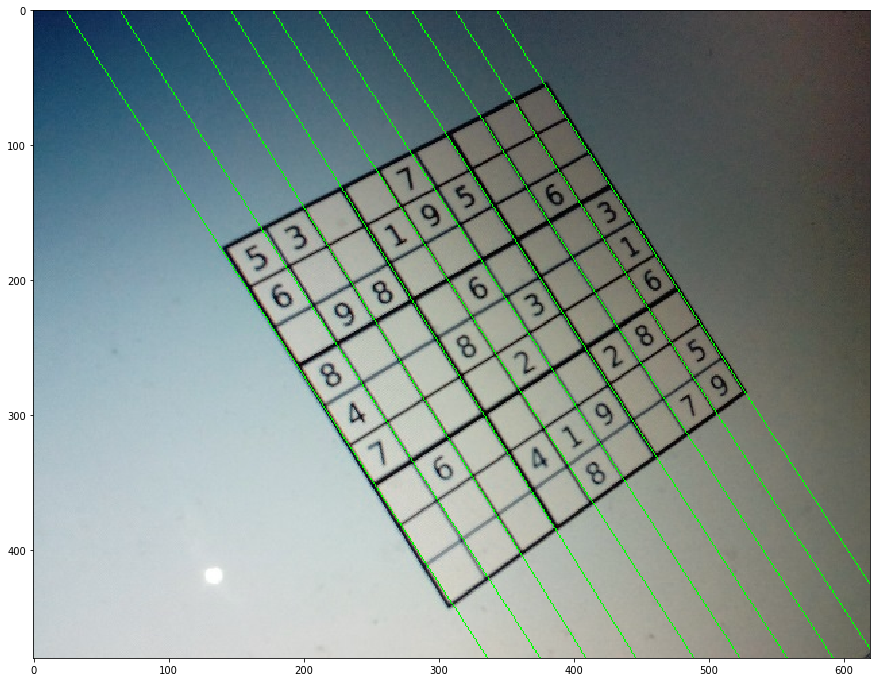

In [284]:
def distinct_lines(ls, n=10):
#     print(ls)
    rhos = np.array(list(line[0][0] for line in ls))
#     print(len(rhos))
    sorted_indexes = np.argsort(rhos)
    sorted_rhos = rhos[sorted_indexes]
    sorted_lines = ls[sorted_indexes]
#     print(sorted_rhos)
#     print(sorted_lines)
    linspace = np.linspace(sorted_rhos[0], sorted_rhos[len(sorted_rhos)-1], n)
    plt.hist(rhos, bins=22)
    plt.plot(linspace, np.zeros(len(linspace)), "o")
    classified_lines = nearest_neighbors(sorted_rhos, linspace)
    print(classified_lines)
    
    final_lines = sorted_lines[list(temp[int(len(temp)/2)] for temp in classified_lines)]
#     print(final_lines)

    
    return final_lines


rgb_img = cv2.imread(path)
for line in distinct_lines(lines_1):
    line = line[0]
    x1, y1, x2, y2 = rho_theta_to_coords(line)
    cv2.line(rgb_img, (x1, y1), (x2, y2), (0, 255, 0), 1)

plt.figure(figsize=(15, 15))
plt.imshow(rgb_img)
plt.show()

rgb_img = cv2.imread(path)
for line in distinct_lines(lines_2):
    line = line[0]
    x1, y1, x2, y2 = rho_theta_to_coords(line)
    cv2.line(rgb_img, (x1, y1), (x2, y2), (0, 255, 0), 1)

plt.figure(figsize=(15, 15))
plt.imshow(rgb_img)
plt.show()